# READ DATA

In [1]:
#Libraries
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Data
climate_data = np.genfromtxt("graphdata_location.csv", delimiter = ',', skip_header = 1)[:, 1:]
climate_sevilla = np.genfromtxt("sevilla_graphdata.csv", delimiter = ',', skip_header = 1)[:, 1:]

days = np.arange(365)

# Climate Data

## Daily DNI

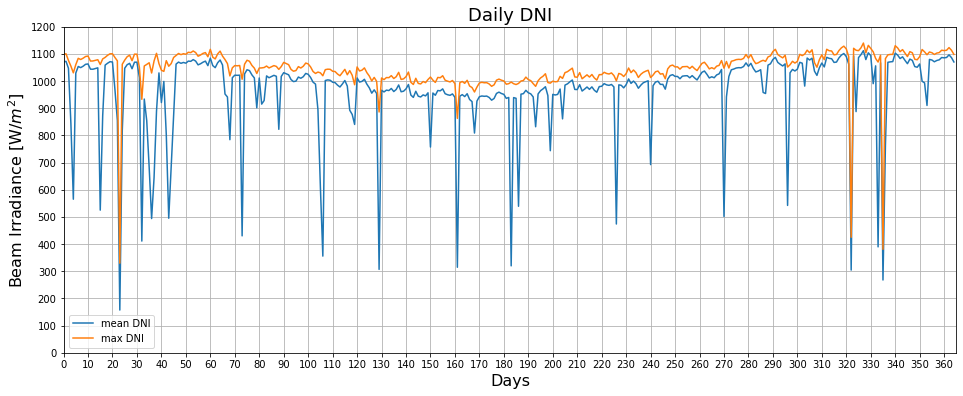

In [3]:
#DNI
dni = climate_data[:, 0].reshape((365, 24)).T[9:17,:]
mean_dni = np.mean(dni, axis= 0)
max_dni = np.max(dni, axis= 0)

#Graph
plt.figure(figsize=(16, 6)) #Image Size
plt.plot(days, mean_dni, label= 'mean DNI')
plt.plot(days, max_dni, label= 'max DNI')
plt.yticks(np.arange(0, 1300, 100))
plt.xticks(np.arange(0, 370, 10))
plt.xlabel(r'Days', fontsize=16)
plt.ylabel(r'Beam Irradiance [W/$m^2$]', fontsize=16)
plt.title("Daily DNI", fontsize=18)
plt.xlim(0, 365)
plt.legend()
plt.grid()

#Save figure
plt.savefig('daily_dni.png', format='png', bbox_inches='tight')
plt.show()

In [6]:
sum_dni = np.sum(dni, axis= 0)
mean_sum_dni = np.mean(sum_dni)
sum_yearly_dni = np.sum(sum_dni)

Design DNI:  [1080.]


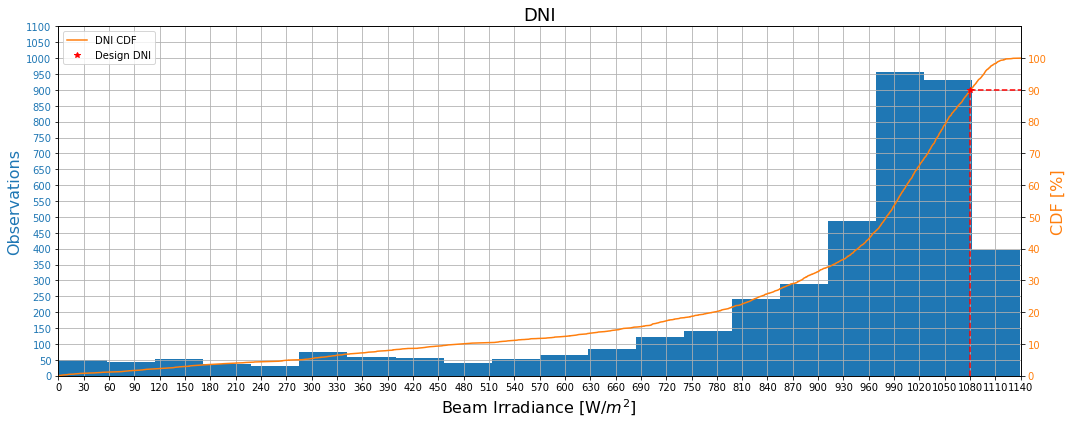

In [18]:
#Cumulative frequency curve
x = np.sort(climate_data[:, 0][climate_data[:, 0] != 0])
y = 100 * np.arange(len(x)) / (len(x) - 1)

#Design point
design_point = 90
y_design = y[y <= design_point]
index = np.where(y == y_design[-1])
observation = x[index]

print('Design DNI: ', np.round(observation,0))

#Graph
fig, ax1 = plt.subplots(figsize=(15, 6))

color = 'tab:blue'
ax1.set_xlabel('Beam Irradiance [W/$m^2$] ', fontsize= 16)
ax1.set_ylabel('Observations', fontsize= 16, color= color)
ax1.hist(x, bins= 20, label= 'Measured DNI histogram')
ax1.tick_params(axis='y', labelcolor= color)
ax1.set_title("DNI", fontsize=18)
ax1.set_yticks(np.arange(0, 1150, 50))
plt.xticks(np.arange(0, 1200, 30))
ax1.set_xlim(0, 1140)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel(r'CDF [%]', fontsize= 16, color= color)  # we already handled the x-label with ax1
ax2.plot(x, y, color= color, label= 'DNI CDF')
ax2.plot([observation, observation], [0, design_point], 'r--')
ax2.plot([observation, 1140], [design_point, design_point], 'r--')
ax2.plot(observation, design_point, 'r*', label= 'Design DNI')
ax2.set_ylim(0, 110)
ax2.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#Save figure
plt.savefig('dni.png', format='png', bbox_inches='tight')
plt.show()

Design DNI:  [858.]


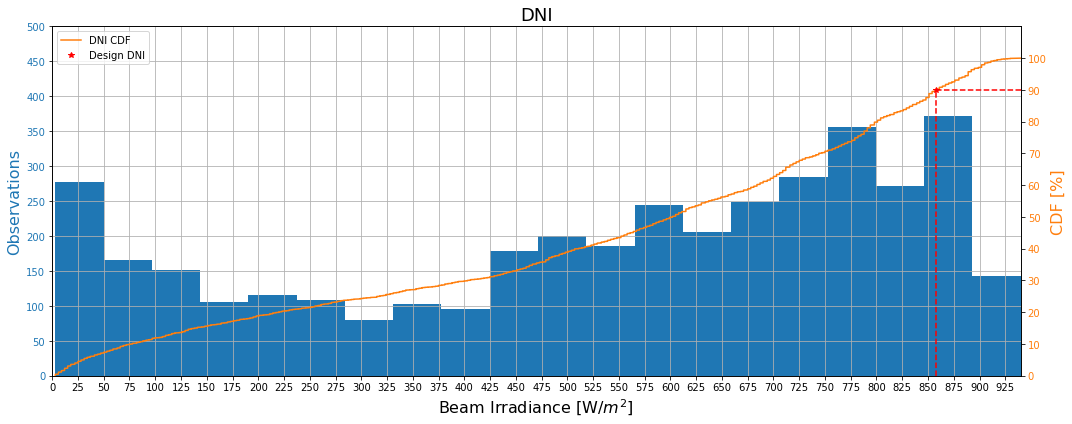

In [21]:
## SEVILLA ##
#Cumulative frequency curve
x = np.sort(climate_sevilla[climate_sevilla != 0])
y = 100 * np.arange(len(x)) / (len(x) - 1)

#Design point
design_point = 90
y_design = y[y <= design_point]
index = np.where(y == y_design[-1])
observation = x[index]

print('Design DNI: ', np.round(observation,0))

#Graph
fig, ax1 = plt.subplots(figsize=(15, 6))

color = 'tab:blue'
ax1.set_xlabel('Beam Irradiance [W/$m^2$] ', fontsize= 16)
ax1.set_ylabel('Observations', fontsize= 16, color= color)
ax1.hist(x, bins= 20, label= 'Measured DNI histogram')
ax1.tick_params(axis='y', labelcolor= color)
ax1.set_title("DNI", fontsize=18)
ax1.set_yticks(np.arange(0, 550, 50))
plt.xticks(np.arange(0, 1000, 25))
ax1.set_xlim(0, x[-1])
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel(r'CDF [%]', fontsize= 16, color= color)  # we already handled the x-label with ax1
ax2.plot(x, y, color= color, label= 'DNI CDF')
ax2.plot([observation, observation], [0, design_point], 'r--')
ax2.plot([observation, 1140], [design_point, design_point], 'r--')
ax2.plot(observation, design_point, 'r*', label= 'Design DNI')
ax2.set_ylim(0, 110)
ax2.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#Save figure
plt.savefig('dni_sevilla.png', format='png', bbox_inches='tight')
plt.show()

# Seawater pumping

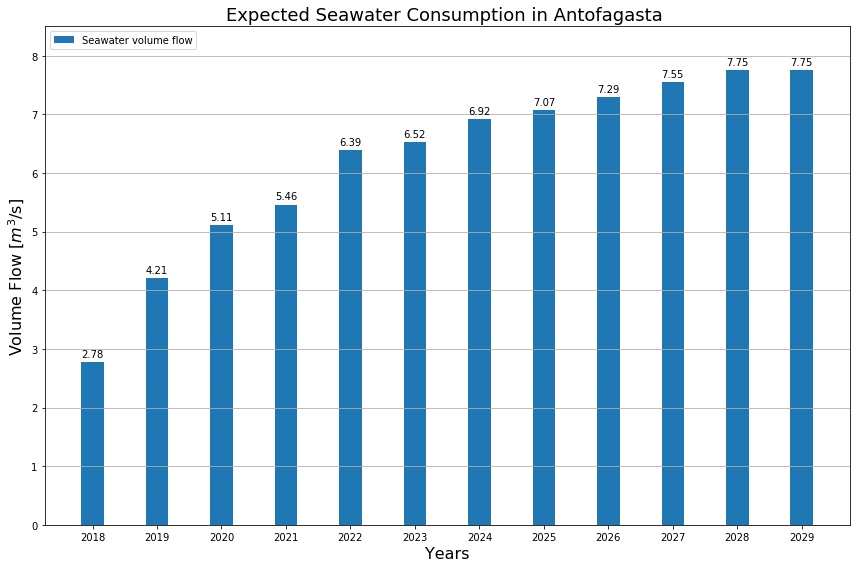

In [5]:
#Water
labels = ['2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029']
water = [2.785, 4.211, 5.111, 5.456, 6.387, 6.519, 6.920, 7.066, 7.289, 7.550, 7.748, 7.751]
water = np.round(water, 2)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x, water, width, label='Seawater volume flow')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(r'Volume Flow [$m^3$/s]', fontsize=16)
ax.set_xlabel('Years', fontsize= 16)
ax.set_title('Expected Seawater Consumption in Antofagasta ', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 8.5)
ax.legend(loc= 'upper left')
ax.grid(axis= 'y')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

#Save figure
plt.savefig('water.png', format='png', bbox_inches='tight')
plt.show()


## Ambient Temperature

In [2]:
#Get dry bulb temperature
dry_bulb = climate_data[:, 1].reshape((365, 24)).T
mean_dry_bulb = np.mean(dry_bulb[12:15, :], axis= 0)
mean_dry_midday = np.mean(mean_dry_bulb, axis= 0)
#Get wet bulb temperature
wet_bulb = climate_data[:, 2].reshape((365, 24)).T
mean_wet_bulb = np.mean(wet_bulb[12:15, :], axis= 0)
mean_wet_midday = np.mean(mean_wet_bulb, axis= 0)

#Graph
plt.figure(figsize=(16, 6)) #Image Size
plt.plot(days, mean_dry_bulb, label= 'Dry bulb temperature')
plt.plot(days, mean_wet_bulb, label= 'Wet bulb temperature')
plt.plot([0, 365], [mean_dry_midday, mean_dry_midday], label= 'mean dry bulb temperature')
plt.plot([0, 365], [mean_wet_midday, mean_wet_midday], label= 'mean wet bulb temperature')
plt.yticks(np.arange(0,34, 2))
plt.xticks(np.arange(0, 370, 10))
plt.xlabel(r'Days', fontsize=16)
plt.ylabel(r'Temperature [$C^\circ$]', fontsize=16)\
plt.xlabel('Years', fontsize= 16)
plt.title("Mid-Day Ambient Temperature", fontsize=18)
plt.xlim(0, 365)
plt.legend()
plt.grid()

#Save figure
plt.savefig('daily_temperature.png', format='png', bbox_inches='tight')
plt.show()

print(r'Mean dry temperature: ', np.round(mean_dry_midday,0))
print(r'Mean wet temperature: ', np.round(mean_wet_midday,0))

SyntaxError: invalid syntax (<ipython-input-2-e7c9375a5329>, line 20)

## Representative Days

In [7]:
day_temp = np.mean(dry_bulb, axis= 0)
dni = climate_data[:, 0].reshape((365, 24)).T
hours = np.arange(0, 24, 1)
#Hot 
hot_date = np.where(day_temp == np.max(day_temp))
hottest_day = dry_bulb[:, hot_date[0]]
hottest_dni = dni[:, hot_date[0]]
#Cold
cold_date = np.where(day_temp == np.min(day_temp))
coldest_day = dry_bulb[:, cold_date[0]]
coldest_dni = dni[:, cold_date[0]]
#Days
base = datetime.date(2020, 1, 1)
date_list = [base + datetime.timedelta(days=x) for x in range(365)]


#Graph
plt.figure(figsize=(16, 6)) #Image Size
plt.plot(hours, hottest_day, 'o-', color= 'tab:orange', label= 'Hottest Day')
plt.plot(hours, coldest_day,'o-', color= 'tab:blue', label= 'Coldest Day')
plt.yticks(np.arange(0,38, 2))
plt.xticks(hours)
plt.xlabel(r'Hours [hr]', fontsize=16)
plt.ylabel(r'Temperature [$C^\circ$]', fontsize=16)
plt.title("Temperature Comparison", fontsize=18)
plt.xlim(0, 23)
plt.legend()
plt.grid()

#Save figure
plt.savefig('temperature_difference.png', format='png', bbox_inches='tight')
plt.show()

NameError: name 'dry_bulb' is not defined

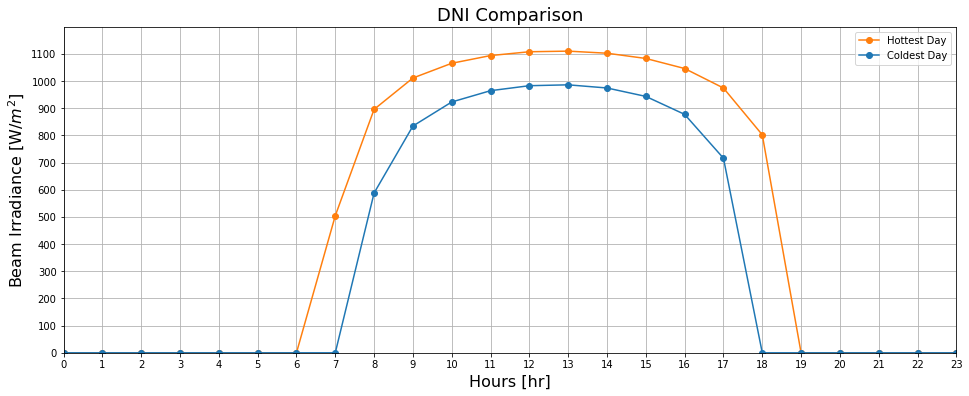

In [18]:
#Graph
plt.figure(figsize=(16, 6)) #Image Size
plt.plot(hours, hottest_dni, 'o-', color= 'tab:orange', label= 'Hottest Day')
plt.plot(hours, coldest_dni,'o-', color= 'tab:blue', label= 'Coldest Day')
plt.yticks(np.arange(0,1200, 100))
plt.xticks(hours)
plt.xlabel(r'Hours [hr]', fontsize=16)
plt.ylabel(r'Beam Irradiance [W/$m^2$]', fontsize=16)
plt.title("DNI Comparison", fontsize=18)
plt.xlim(0, 23)
plt.ylim(0, 1200)
plt.legend()
plt.grid()

#Save figure
plt.savefig('dni_difference.png', format='png', bbox_inches='tight')
plt.show()

## Ocean temperature

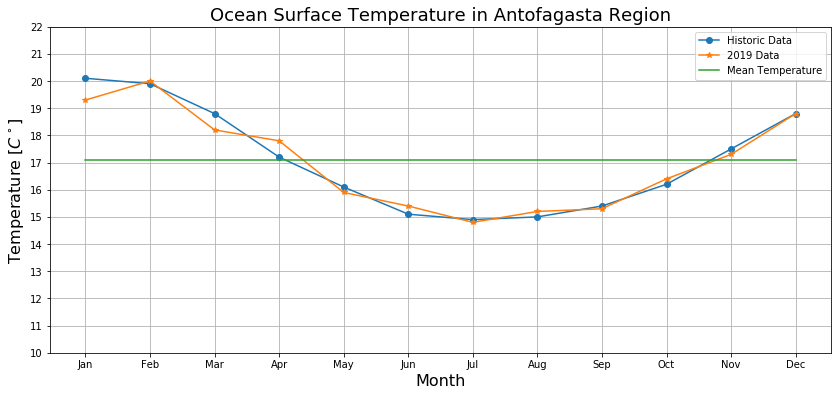

Mean sea temperature:  17.0


In [8]:
#Ocean surface
sea_mean_t = [19.3, 20, 18.2, 17.8, 15.9, 15.4, 14.8, 15.2, 15.3, 16.4, 17.3, 18.8]
sea_mean_hist_t = [20.1, 19.9, 18.8, 17.2, 16.1, 15.1, 14.9, 15, 15.4, 16.2, 17.5, 18.8]
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#Graph
plt.figure(figsize=(14, 6)) #Image Size
plt.plot(month, sea_mean_hist_t, 'o-', label= 'Historic Data')
plt.plot(month, sea_mean_t, '*-', label= '2019 Data')
plt.plot(['Jan', 'Dec'], [np.mean(sea_mean_hist_t), np.mean(sea_mean_hist_t)], label= 'Mean Temperature')
plt.yticks(np.arange(10,23, 1))
plt.xlabel(r'Month', fontsize=16)
plt.ylabel(r'Temperature [$C^\circ$]', fontsize=16)
plt.title("Ocean Surface Temperature in Antofagasta Region", fontsize=18)
plt.legend()
plt.grid()

#Save figure
plt.savefig('sea_temperature.png', format='png', bbox_inches='tight')
plt.show()

print(r'Mean sea temperature: ', np.round(np.mean(sea_mean_hist_t),0))





